In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="darkgrid")
sns.set(style="ticks", color_codes=True)

In [2]:
df_raw = pd.read_csv("../dataset/google-play-store-apps/googleplaystore.csv")

In [3]:
df_raw.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
df_raw.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

# First Look


Most of the types are in object form except the ratings.


In [4]:
df_raw.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [7]:
df_raw = df_raw.dropna()

In [8]:
df_raw.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [9]:
df_raw['Reviews'] = df_raw['Reviews'].astype(int);
df_raw['Price'] = df_raw['Price'].astype(str);
df_raw['Size'] = df_raw['Size'].astype(str);
df_raw['Installs'] = df_raw['Installs'].astype(str);

In [10]:
df_raw.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [11]:
df_raw['Size']  = df_raw['Size'].map(lambda x: x.rstrip('MmKk'))
df_raw = df_raw[df_raw['Size'] != 'Varies with device']
df_raw['Size'] = df_raw['Size'].astype(float)

In [12]:
df_raw['Installs']  = df_raw['Installs'].map(lambda x: x.rstrip('+'))
df_raw['Installs'] = df_raw['Installs'].str.replace(',', '', regex=False)
df_raw['Installs'] = df_raw['Installs'].astype('category')

In [13]:
df_raw['Price']  = df_raw['Price'].map(lambda x: x.lstrip('$'))
df_raw['Price'] = df_raw['Price'].str.replace(',', '', regex=False)
df_raw['Price'] = df_raw['Price'].astype(float)

In [14]:
df_raw['Last Updated'] = df_raw['Last Updated'].str.replace(' |,', "")
df_raw['Last Updated'] = pd.to_datetime(df_raw['Last Updated'], format='%B%d%Y')
df_raw['Category'] = df_raw['Category'].astype('category')
df_raw['Type'] = df_raw['Type'].astype('category')
df_raw['Content Rating'] = df_raw['Content Rating'].astype('category')
df_raw['Genres'] = df_raw['Genres'].astype('category')
df_raw['Current Ver'] = df_raw['Current Ver'].astype('category')
df_raw['Android Ver'] = df_raw['Android Ver'].astype('category')
df_raw.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [15]:
df_raw.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [16]:
df_raw.describe()

,Rating,Reviews,Size,Price
count,7723.000000,7.723000e+03,7723.00000,7723.000000
mean,4.173935,2.948983e+05,37.30707,1.128169
std,0.544638,1.863933e+06,93.54223,17.408036
min,1.000000,1.000000e+00,1.00000,0.000000
25%,4.000000,1.075000e+02,6.10000,0.000000
50%,4.300000,2.332000e+03,16.00000,0.000000
75%,4.500000,3.905300e+04,37.00000,0.000000
max,5.000000,4.489389e+07,994.00000,400.000000


[Text(0,0,'1.0'),
 Text(0,0,'5.0'),
 Text(0,0,'10.0'),
 Text(0,0,'50.0'),
 Text(0,0,'100.0'),
 Text(0,0,'500.0'),
 Text(0,0,'1000.0'),
 Text(0,0,'5000.0'),
 Text(0,0,'10000.0'),
 Text(0,0,'50000.0'),
 Text(0,0,'100000.0'),
 Text(0,0,'500000.0'),
 Text(0,0,'1000000.0'),
 Text(0,0,'5000000.0'),
 Text(0,0,'10000000.0'),
 Text(0,0,'50000000.0'),
 Text(0,0,'100000000.0'),
 Text(0,0,'500000000.0'),
 Text(0,0,'1000000000.0')]

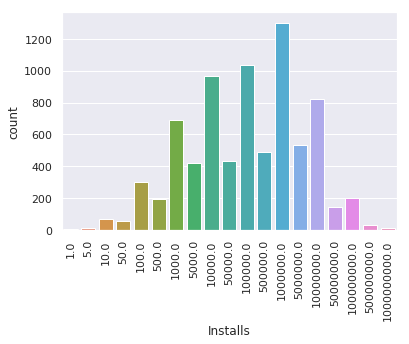

In [94]:
g = sns.countplot(df_raw['Installs']);
g.set_xticklabels(g.get_xticklabels(), rotation=90)

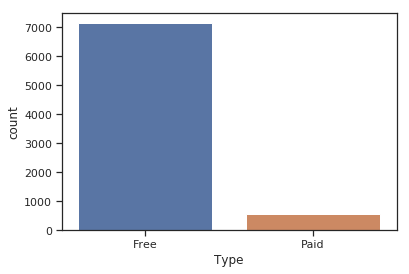

In [17]:
sns.countplot(df_raw['Type'])

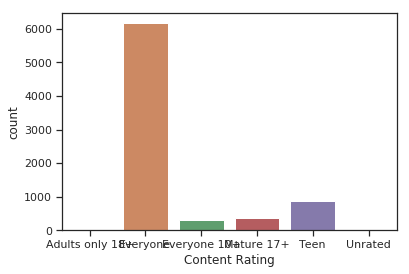

In [18]:
sns.countplot(df_raw['Content Rating'])

ValueError: left cannot be >= right

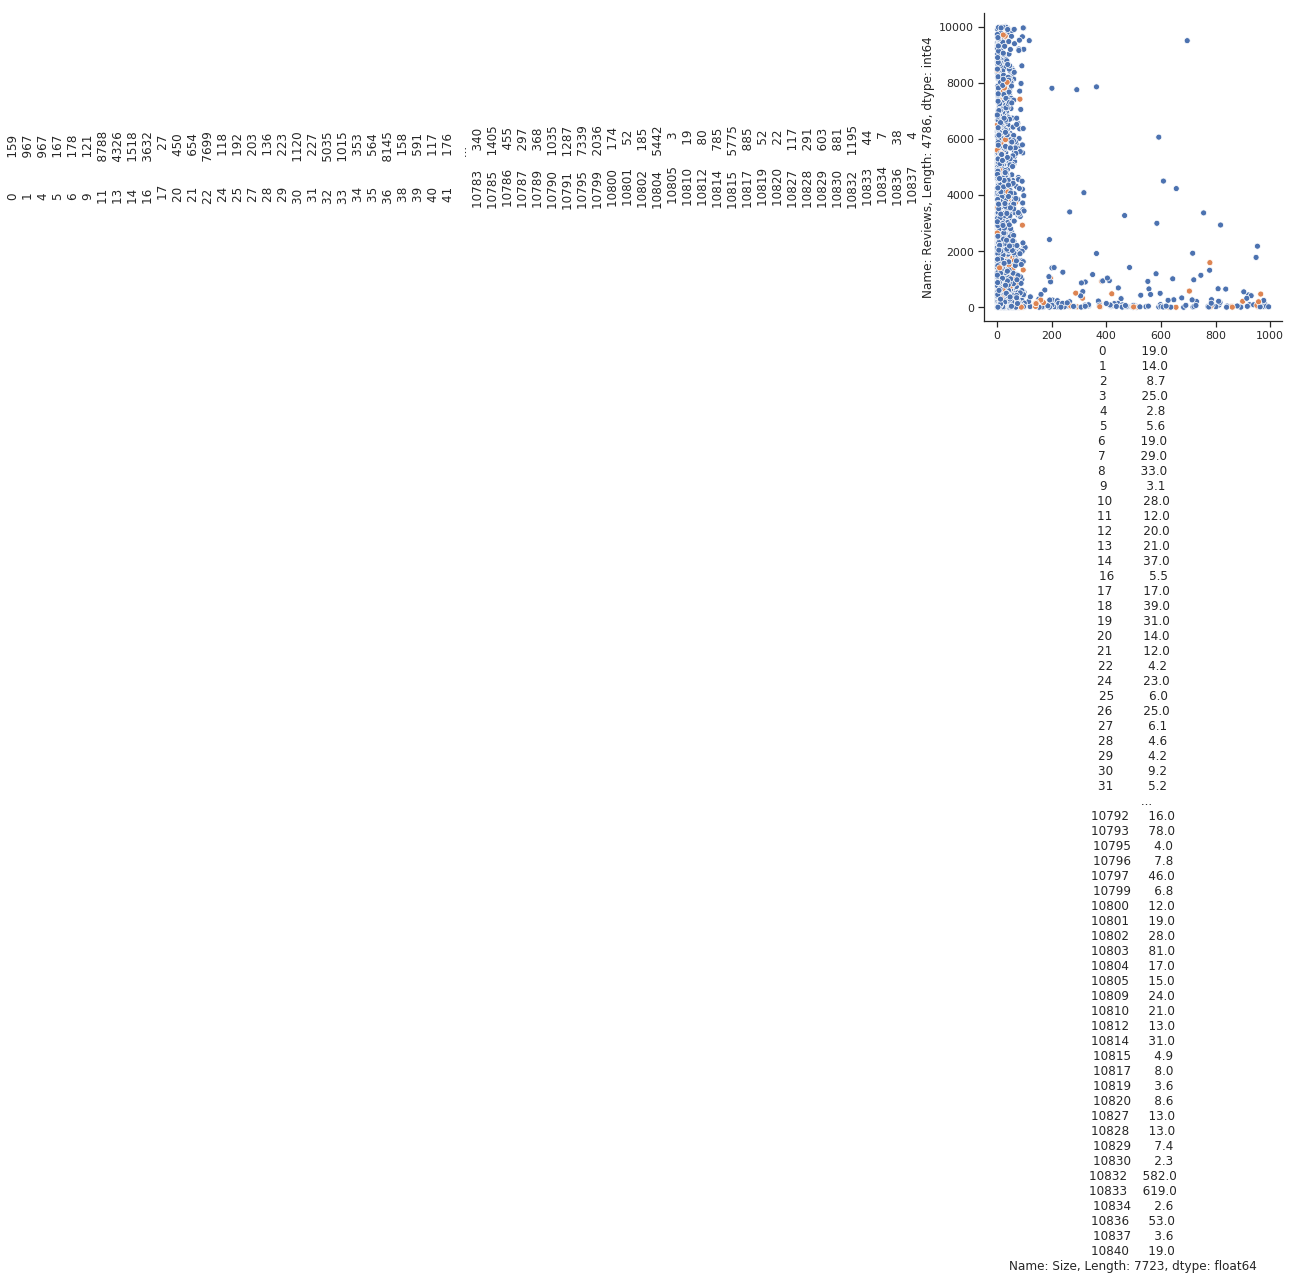

In [41]:
sns.relplot(x=(df_raw[df_raw['Size'] >0].Size), y=(df_raw[df_raw['Reviews'] < 10000].Reviews), hue=df_raw.Type, data=df_raw)

In [29]:
df_raw[df_raw['Reviews'] < 100000].Reviews

0          159
1          967
2        87510
4          967
5          167
6          178
7        36815
8        13791
9          121
10       13880
11        8788
12       44829
13        4326
14        1518
16        3632
17          27
20         450
21         654
22        7699
24         118
25         192
26       20260
27         203
28         136
29         223
30        1120
31         227
32        5035
33        1015
34         353
         ...  
10790     1035
10791     1287
10792    21661
10793    28510
10795     7339
10796    61445
10797    32433
10799     2036
10800      174
10801       52
10802      185
10803    56496
10804     5442
10805        3
10810       19
10812       80
10814      785
10815     5775
10817      885
10819       52
10820       22
10827      117
10828      291
10829      603
10830      881
10832     1195
10833       44
10834        7
10836       38
10837        4
Name: Reviews, Length: 6413, dtype: int64